<span style='color:Green; font-weight: bold;'>Regression</span>

1- Load the libraries:


In [1]:
import numpy as np # used for numerical operations
import pandas as pd # used for data manipulation and analysis
import matplotlib.pyplot as plt # used for data visualization

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


2-Load the Dataset:

In [2]:
Housing_dataframe = pd.read_csv('California_Houses.csv') # load data from file

3-Seperate The features and the target:

In [3]:
X_housing = Housing_dataframe.drop('Median_House_Value', axis=1) # drop the target column
y_housing = Housing_dataframe['Median_House_Value']# set the target column
print(X_housing.head())
print(y_housing.head())
print(X_housing.shape)
print(y_housing.shape)


   Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  Population  Households  \
0         8.3252          41        880           129         322         126   
1         8.3014          21       7099          1106        2401        1138   
2         7.2574          52       1467           190         496         177   
3         5.6431          52       1274           235         558         219   
4         3.8462          52       1627           280         565         259   

   Latitude  Longitude  Distance_to_coast  Distance_to_LA  \
0     37.88    -122.23        9263.040773   556529.158342   
1     37.86    -122.22       10225.733072   554279.850069   
2     37.85    -122.24        8259.085109   554610.717069   
3     37.85    -122.25        7768.086571   555194.266086   
4     37.85    -122.25        7768.086571   555194.266086   

   Distance_to_SanDiego  Distance_to_SanJose  Distance_to_SanFrancisco  
0         735501.806984         67432.517001              21250.213767  


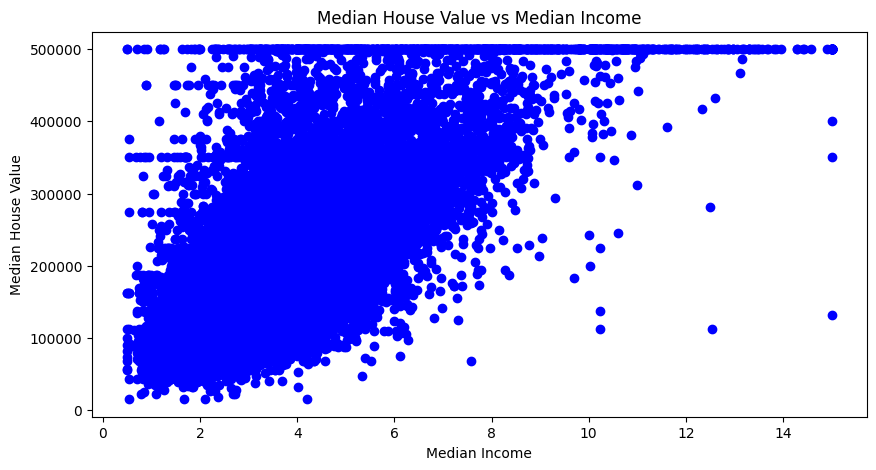

In [4]:
plt.figure(figsize=(10, 5))
plt.scatter(X_housing['Median_Income'], y_housing, color='blue')
plt.title('Median House Value vs Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()



4-Split The Dataset:

In [5]:

train_x, test_x, train_y, test_y = train_test_split(X_housing, y_housing, test_size=0.15, random_state=42) # split the data into training and testing sets


5-Appling K-Fold Cross-Validation:

In [6]:
kf = KFold(n_splits=6, shuffle=True, random_state=42) # create a KFold object  used for cross validation with 6 splits,5 folds for training and 1 fold for testing(X_Val)

6-Standardization:

In [7]:
scaler = StandardScaler() # create a StandardScaler object for normalization


7-Store results:

In [8]:
results = {"Linear Regression": {"Mean Square Error": [], "Mean Absolute Error": []},
           "Lasso Regression": {"Mean Square Error": [], "Mean Absolute Error": []},
           "Ridge Regression": {"Mean Square Error": [], "Mean Absolute Error": []}}
# create a dictionary to store the results of the different models

8- Linear Regression

In [9]:
def linear_regression(X_train, y_train, X_val, y_val):
    linear = LinearRegression() # create a LinearRegression object
    linear.fit(X_train, y_train) # fit the model
    y_pred_linear = linear.predict(X_val) # make predictions
    mse = mean_squared_error(y_val, y_pred_linear) # calculate the mean squared error
    mae = mean_absolute_error(y_val, y_pred_linear) # calculate the mean absolute error
   
    return linear,y_pred_linear ,mse, mae

9-Lasso Regression:

In [10]:
def lasso_regression(X_train, y_train, X_val, y_val, alpha=50):
    lasso = Lasso(alpha=alpha, max_iter=10000) # create a Lasso object with the specified alpha and max_iter to converge 
    lasso.fit(X_train, y_train) 
    y_pred_lasso = lasso.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_lasso) 
    mae = mean_absolute_error(y_val, y_pred_lasso)
   
    return lasso,y_pred_lasso ,mse, mae

10-Ridge Regression:

In [11]:
def ridge_regression(X_train, y_train, X_val, y_val, alpha=50):
    ridge = Ridge(alpha=alpha) # create a Ridge object with the specified alpha
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_ridge)
    mae = mean_absolute_error(y_val, y_pred_ridge)
   
    return ridge,y_pred_ridge ,mse, mae


11- Plotting the Results:

In [12]:
def plot_results(results):
    for model in results:
        mse = results[model]["Mean Square Error"] # get the mean squared error
        mae = results[model]["Mean Absolute Error"] # get the mean absolute error
        # Plotting Mean Square Error
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(mse, label='MSE')
        plt.title(f'{model} - Mean Square Error')
        plt.xlabel('Fold')
        plt.ylabel('MSE')
        plt.legend()
        plt.grid(True) 
        
        # Plotting Mean Absolute Error
        plt.subplot(1, 2, 2)
        plt.plot(mae, label='MAE')
        plt.title(f'{model} - Mean Absolute Error')
        plt.xlabel('Fold')
        plt.ylabel('MAE')
        plt.legend()
        plt.grid(True)  
        
        # Display the plots
        plt.tight_layout()
        plt.show()


12-  Training the Model:

In [13]:

for train_index, val_index in kf.split(train_x):
    X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index] # get the training and validation sets and scale the data
    y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index] 

    X_train = scaler.fit_transform(X_train) # fit and transform the training set
    X_val = scaler.transform(X_val)

    # Linear Regression
    linear_model,y_pred_linear, mse, mae = linear_regression(X_train, y_train, X_val, y_val)
    results["Linear Regression"]["Mean Square Error"].append(mse) # append the mean squared error to the results dictionary
    results["Linear Regression"]["Mean Absolute Error"].append(mae)

    # Lasso Regression
    lasso_model, y_pred_lasso,mse, mae = lasso_regression(X_train, y_train, X_val, y_val)
    results["Lasso Regression"]["Mean Square Error"].append(mse)
    results["Lasso Regression"]["Mean Absolute Error"].append(mae)

    # Ridge Regression
    ridge_model,y_pred_ridge, mse, mae = ridge_regression(X_train, y_train, X_val, y_val)
    results["Ridge Regression"]["Mean Square Error"].append(mse)
    results["Ridge Regression"]["Mean Absolute Error"].append(mae)

    # Print Predicted Median House Values for Training Set
    print("\nPredicted Median House Values (Training Set):")
    print("Linear Regression:", y_pred_linear)
    print("Lasso Regression:", y_pred_lasso)
    print("Ridge Regression:", y_pred_ridge)



Predicted Median House Values (Training Set):
Linear Regression: [145594.25149692 323700.08842157 169335.03461287 ... 291574.81518096
 271947.07210167 273624.93430348]
Lasso Regression: [147917.52975073 325755.20351794 170605.46340119 ... 294087.34504353
 273025.95958742 269472.73537896]
Ridge Regression: [146088.55614966 325343.76290227 170451.40786837 ... 293363.39172662
 273404.90824385 267677.5036056 ]

Predicted Median House Values (Training Set):
Linear Regression: [106545.86434115  63023.01116778  87612.45047063 ... 313040.76278161
 181936.44413518 140815.17080763]
Lasso Regression: [105182.48887099  63771.94118705  90141.91795554 ... 309864.13994273
 184885.3378043  141765.65198218]
Ridge Regression: [105060.01374714  66670.02440741  92751.35537469 ... 307495.57963649
 187607.42035514 143008.0841456 ]

Predicted Median House Values (Training Set):
Linear Regression: [211281.36258641  62373.39455411 217445.38831138 ... 245495.92359205
 133450.12760714 317277.74373659]
Lasso Reg

13- Displaying the MSE & MAE Results:


Linear Regression:
Average Mean Square Error: 4704039022.857062
Average Mean Absolute Error: 49777.04718315246

Lasso Regression:
Average Mean Square Error: 4707573008.774576
Average Mean Absolute Error: 49839.86394445641

Ridge Regression:
Average Mean Square Error: 4715187043.432994
Average Mean Absolute Error: 49979.18078489419


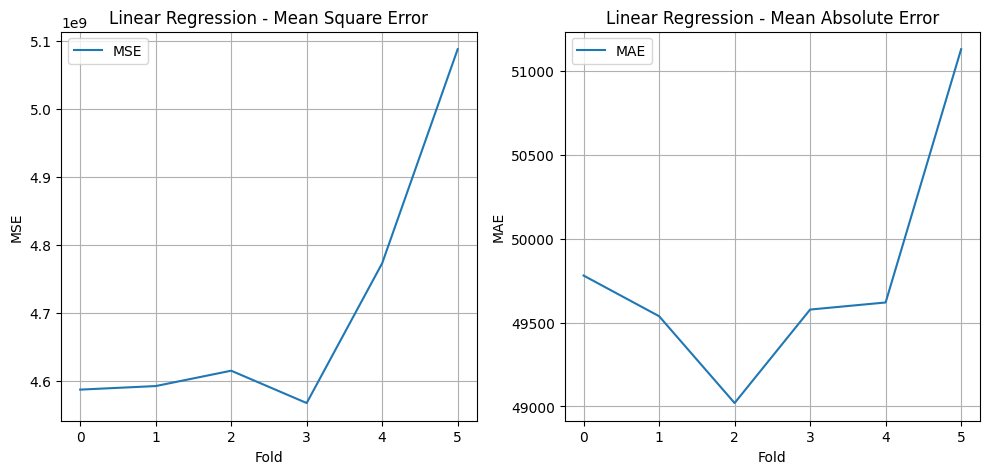

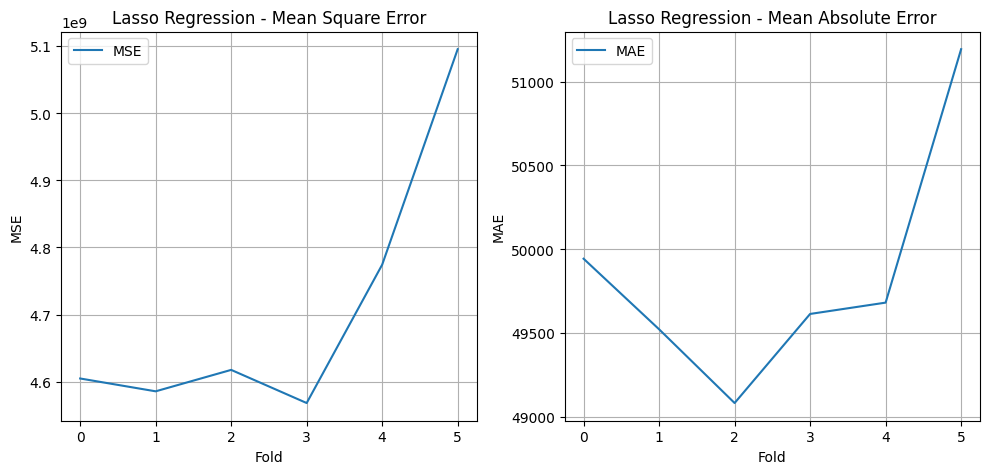

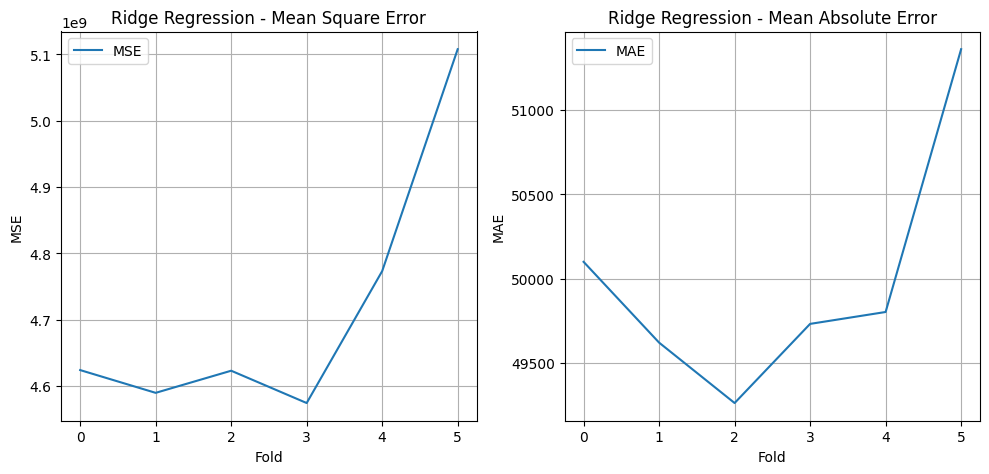

In [14]:
for name in results:
    print(f"\n{name}:")
    print(f"Average Mean Square Error: {np.mean(results[name]['Mean Square Error'])}")
    print(f"Average Mean Absolute Error: {np.mean(results[name]['Mean Absolute Error'])}")

plot_results(results)

14-Test Set Evaluation:

In [15]:
# --- FINAL TEST SET EVALUATION (After K-Fold Cross-Validation) ---
test_x = scaler.transform(test_x)  # Apply same scaling
print("\n--- Evaluating on Final 15% Test Set ---")
final_models = {}
# Use the trained models from K-Fold cross-validation
for name, trained_model in zip(["Linear Regression", "Lasso Regression", "Ridge Regression"],
                               [linear_model, lasso_model, ridge_model]):  # Use trained models
    y_pred_test = trained_model.predict(test_x)  # Use trained model to predict
    mse = mean_squared_error(test_y, y_pred_test)
    mae = mean_absolute_error(test_y, y_pred_test)

    final_models[name] = trained_model
    results[name]["Mean Square Error"].append(mse)
    results[name]["Mean Absolute Error"].append(mae)

    print(f"\n{name}:")
    print(f"Mean Square Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Predicted Median House Values (Testing Set): {y_pred_test[:10]}")


    


--- Evaluating on Final 15% Test Set ---

Linear Regression:
Mean Square Error: 4859183161.625992
Mean Absolute Error: 50727.67930424335
Predicted Median House Values (Testing Set): [ 34831.87007291 174637.04910812 332586.69467319 280739.85817876
 255407.33736448 205195.29156951 270606.55582927 212973.63092287
 272350.16346946 398528.0630992 ]

Lasso Regression:
Mean Square Error: 4866561852.884435
Mean Absolute Error: 50811.13207084637
Predicted Median House Values (Testing Set): [ 33775.41025802 173597.54397541 328741.18465636 279371.66364349
 255945.35972363 204677.43676963 270961.71611141 213275.65977154
 272654.81408728 398282.10301593]

Ridge Regression:
Mean Square Error: 4873599295.031258
Mean Absolute Error: 50943.71420869893
Predicted Median House Values (Testing Set): [ 32093.35962334 170356.03935281 326053.67283206 277777.62788922
 252854.19005563 205801.35259728 271462.15551579 213884.95919204
 271636.67188712 398033.16732237]


15- Plot The Regressions:

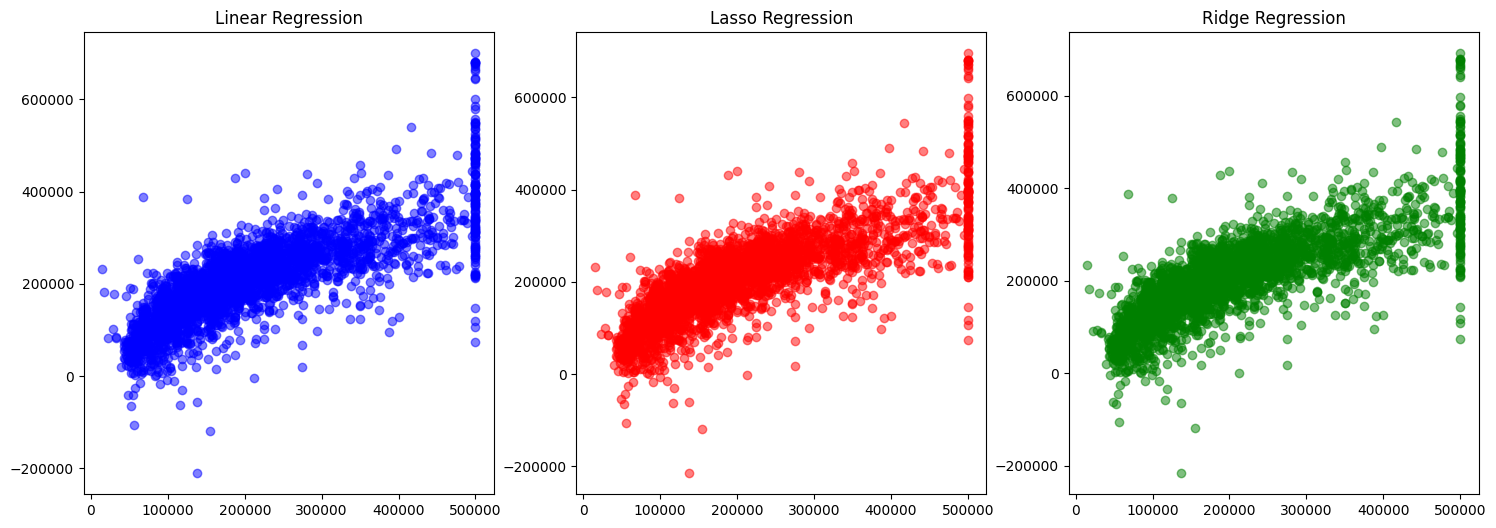

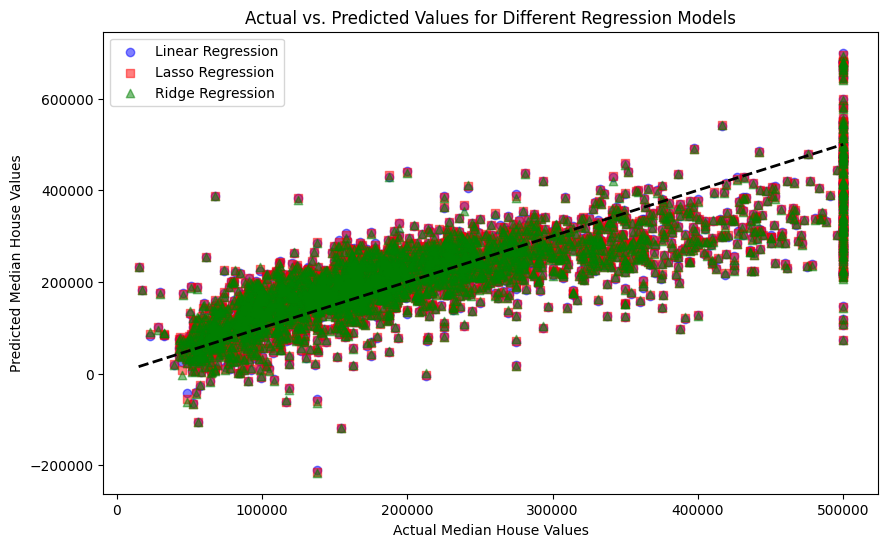

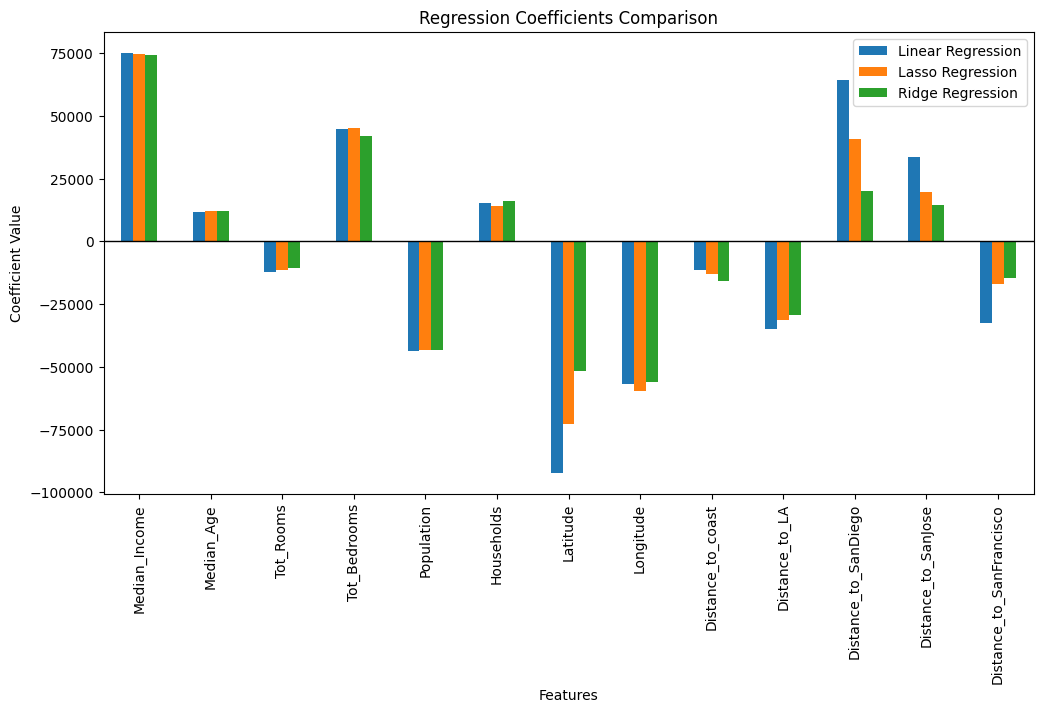

In [16]:
# --- Evaluate Final Models ---
# Plot Actual vs. Predicted Values 

y_pred_lr = linear_model.predict(test_x)
y_pred_lasso = lasso_model.predict(test_x)
y_pred_ridge = ridge_model.predict(test_x)


fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].scatter(test_y, y_pred_lr, color='blue', alpha=0.5)
axs[0].set_title("Linear Regression")

axs[1].scatter(test_y, y_pred_lasso, color='red', alpha=0.5)
axs[1].set_title("Lasso Regression")

axs[2].scatter(test_y, y_pred_ridge, color='green', alpha=0.5)
axs[2].set_title("Ridge Regression")

plt.show()


plt.figure(figsize=(10, 6))

# Use different markers for each model
plt.scatter(test_y, y_pred_lr, label="Linear Regression", alpha=0.5, marker="o", color="blue")
plt.scatter(test_y, y_pred_lasso, label="Lasso Regression", alpha=0.5, marker="s", color="red")
plt.scatter(test_y, y_pred_ridge, label="Ridge Regression", alpha=0.5, marker="^", color="green")

plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='black', linestyle='dashed', linewidth=2)

plt.xlabel("Actual Median House Values")
plt.ylabel("Predicted Median House Values")
plt.title("Actual vs. Predicted Values for Different Regression Models")
plt.legend()
plt.show()


# --- Plot Model Coefficients ---
coefficients = pd.DataFrame({
    "Feature": X_housing.columns,  # Replace with actual feature names
    "Linear Regression": linear_model.coef_,
    "Lasso Regression": lasso_model.coef_,
    "Ridge Regression": ridge_model.coef_
})

coefficients.set_index("Feature").plot(kind="bar", figsize=(12, 6))
plt.title("Regression Coefficients Comparison")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.axhline(0, color='black', linewidth=1)
plt.legend()
plt.show()


15-Training Set Evaluation:

<div class="alert alert-block alert-success">
    <div style="font-family: 'Verdana', sans-serif; font-size: 14px; color: green;">
        <h4>Linear Regression:</h4></p>
        <ul>
            <li><strong>Average Mean Square Error (MSE)</strong>: 4,704,039,022.857062</li></p>
            <li><strong>Average Mean Absolute Error (MAE)</strong>: 49,777.04718315246</li></p>
        </ul>
        <h4>Lasso Regression:</h4>
        <ul>
            <li><strong>Average Mean Square Error (MSE)</strong>: 4,704,038,716.527915</li></p>
            <li><strong>Average Mean Absolute Error (MAE)</strong>: 49,777.11975761978</li></p>
        </ul>
        <h4>Ridge Regression:</h4>
        <ul>
            <li><strong>Average Mean Square Error (MSE)</strong>: 4,704,032,521.0942335</li></p>
            <li><strong>Average Mean Absolute Error (MAE)</strong>: 49,777.38288770586</li></p>
        </ul>
    </div>
</div>

16-Test Set Evaluation:

<div class="alert alert-block alert-success">
    <div style="font-family: 'Verdana', sans-serif; font-size: 14px; color: green;">
        <h4>Linear Regression Final Test Results:</h4>
        <ul>
            <li><strong>Test MSE</strong>: 4,859,183,161.625993</li></p>
            <li><strong>Test MAE</strong>: 50,727.679304243354</li></p>
        </ul>
        <h4>Lasso Regression Final Test Results:</h4>
        <ul>
            <li><strong>Test MSE</strong>: 4,859,190,771.953638</li></p>
            <li><strong>Test MAE</strong>: 50,727.783020306735</li></p>
        </ul>
        <h4>Ridge Regression Final Test Results:</h4>
        <ul>
            <li><strong>Test MSE</strong>: 4,859,210,931.250007</li></p>
            <li><strong>Test MAE</strong>: 50,728.21469793744</li></p>
        </ul>
      </div>
</div>


17-Comparison:

<div class="alert alert-block alert-success">
    <div style="font-family: 'Verdana', sans-serif; font-size: 14px; color: green;">
        <ol>
            <li><strong>Mean Square Error (MSE)</strong>:</p></p>
                <ul>
                    <li>The MSE values for all three models are very close to each other, both in the training and test sets.</li></p></p></p></p>
                    <li>Ridge Regression has the lowest average MSE on the training set, indicating slightly better performance in terms of minimizing the squared errors.</li></p></p></p></p>
                    <li>On the test set, Linear Regression has a slightly lower MSE compared to Lasso and Ridge Regression, but the differences are minimal.</li></p>
                </ul>
            </li>
            <li><strong>Mean Absolute Error (MAE)</strong>:</p></p>
                <ul>
                    <li>The MAE values for all three models are also very close to each other, both in the training and test sets.</li></p></p>
                    <li>Linear Regression has the lowest average MAE on the training set, indicating slightly better performance in terms of minimizing the absolute errors.</li></p></p>
                    <li>On the test set, Linear Regression again has a slightly lower MAE compared to Lasso and Ridge Regression, but the differences are minimal.</li></p>
                </ul>
            </li>
                <li><strong>Model Performance</strong>:</p></p>
                <ul>
                    <li>All three models (Linear, Lasso, and Ridge Regression) perform similarly on this dataset.</li></p></p></p>
                    <li>The differences in MSE and MAE are very small, indicating that the choice of regularization (Lasso or Ridge) does not significantly impact the performance for </p>this particular dataset.</li></p></p></p>
                </ul>
            </li>
            <li><strong>Regularization Impact</strong>:</p></p>
                <ul>
                    <li>Lasso Regression performs feature selection by shrinking some coefficients to zero, which can be useful if there are many irrelevant features.</p></p></p> However, in this case, it does not provide a significant advantage over Linear Regression.</li></p></p></p>
                    <li>Ridge Regression helps in dealing with multicollinearity by shrinking the coefficients, but again, it does not provide a significant advantage over</p> Linear Regression in this case.</li></p></p>
                </ul></p>
            </li>
        </ol>
      </div>
</div>


18-Conclusion:

<div class="alert alert-block alert-danger">
    <div style="font-family: 'Verdana', sans-serif; font-size: 14px; color: maron;">
        <ul>
            <li><strong>Linear Regression</strong>: </p>Performs slightly better in terms of both MSE and MAE on the test set, but the differences are minimal.</li></p></p>
            <li><strong>Lasso Regression</strong>: </p>Performs similarly to Linear Regression, with no significant advantage in this case.</li></p></p>
            <li><strong>Ridge Regression</strong>:</p> Also performs similarly to Linear Regression, with no significant advantage in this case.</li></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p></p>
        </ul>
        <p></p></p></p></p></p></p><span style='color:red; font-weight:Bold;'>Overall, all three models perform similarly on this dataset, and the choice of model may depend on other factors </p>such as interpretability, computational efficiency, and the presence of irrelevant features or multicollinearity in the dataset.</span>
</div>
</div>
